In [2]:
import pandas as pd
import numpy as np

pd.set_option("display.max_rows", None)

In [25]:
def create_df(year):
    return pd.read_csv('../Data/ACO.SSP.PUF.Y{}.csv'.format(year), index_col=0)

def change_to_date(df, col_name):
    df[col_name] = pd.to_datetime(df[col_name])

def generate_col_name():
    col_names = []
    for num in list:
        col_names.append('ACO{}'.format(num))
    return col_names

def remove_commas(df, col_name):
    df[col_name] = df[col_name].str.replace(",","")

def change_to_num(df, col_name):
    df[col_name] = pd.to_numeric(df[col_name], errors="coerce")

def add_col_prefixes(df, year):
    return df.add_prefix('{}_'.format(year))

In [38]:
df16 = create_df(2016)

change_to_date(df16, 'Initial_Start_Date')
change_to_date(df16, 'Current_Start_Date')
list = [1,2,3,4,5,6,7,13,14,15,16,17,18,19,20,21,27,28,30,31,33,34,39,40,41,42]

col_names = generate_col_name()

for col in col_names:
    remove_commas(df16, col)
    change_to_num(df16, col)

remove_commas(df16, 'DM_Comp')
change_to_num(df16,'DM_Comp')

df16 = add_col_prefixes(df16, 16)
    
df16.dtypes

16_ACO_Name                               object
16_ACO_State                              object
16_Agree_Type                             object
16_Agreement_Period_Num                    int64
16_Initial_Start_Date             datetime64[ns]
16_Initial_Track_1                         int64
16_Initial_Track_2                         int64
16_Initial_Track_3                         int64
16_Current_Start_Date             datetime64[ns]
16_Current_Track_1                         int64
16_Current_Track_2                         int64
16_Current_Track_3                         int64
16_Adv_Pay                                 int64
16_AIM                                     int64
16_N_AB                                    int64
16_Sav_rate                              float64
16_MinSavPerc                            float64
16_BnchmkMinExp                            int64
16_GenSaveLoss                             int64
16_EarnSaveLoss                            int64
16_Met_QPS          

In [27]:
df15 = create_df(2015)

for col in df15.columns[6:38]:
    remove_commas(df15, col)
    change_to_num(df15, col)
    
change_to_date(df15, 'Start_Date')

df15 = add_col_prefixes(df15, 15)

df15.dtypes

15_ACO_Name                               object
15_ACO_State                              object
15_Start_Date                     datetime64[ns]
15_Track1                                  int64
15_Track2                                  int64
15_Adv_Pay                                 int64
15_N_AB                                    int64
15_Sav_rate                              float64
15_MinSavPerc                            float64
15_BnchmkMinExp                            int64
15_GenSaveLoss                             int64
15_EarnSaveLoss                            int64
15_QualScore                             float64
15_UpdatedBnchmk                           int64
15_HistBnchmk                              int64
15_ABtotBnchmk                             int64
15_ABtotExp                                int64
15_Adv_Pay_Amt                           float64
15_Adv_Pay_Recoup                        float64
15_QualPerfShare                         float64
15_FinalShareRate   

In [28]:
df14 = create_df(2014)

change_to_date(df14,'Start_Date')
change_to_num(df14, 'QualScore')

df14 = add_col_prefixes(df14, 14)

df14.dtypes

14_ACO_Name                               object
14_ACO_State                              object
14_Start_Date                     datetime64[ns]
14_Track1                                  int64
14_Track2                                  int64
14_Adv_Pay                                 int64
14_N_AB                                    int64
14_Sav_rate                              float64
14_MinSavPerc                            float64
14_BnchmkMinExp                            int64
14_GenSaveLoss                             int64
14_EarnSaveLoss                            int64
14_QualScore                             float64
14_UpdatedBnchmk                           int64
14_HistBnchmk                              int64
14_ABtotBnchmk                             int64
14_ABtotExp                                int64
14_Adv_Pay_Amt                           float64
14_Adv_Pay_Recoup                        float64
14_QualPerfShare                         float64
14_FinalShareRate   

In [29]:
df13 = create_df(2013)

change_to_date(df13, 'Start_Date')
remove_commas(df13, 'BnchmkMinExp')
change_to_num(df13, 'BnchmkMinExp')
df13['EarnShrSavings'] = df13['EarnShrSavings'].astype('int64')

df13 = add_col_prefixes(df13, 13)

df13.dtypes

13_ACO_NAME                              object
13_Start_Date                    datetime64[ns]
13_Track2                                 int64
13_Adv_Pay                                int64
13_Int_Pmt                              float64
13_Adv_Pay_Amt                          float64
13_QualScore                              int64
13_QualPerfShare                        float64
13_FinalShareRate                       float64
13_MinLossPerc                          float64
13_MinSavPerc                           float64
13_ABtotBnchmk                          float64
13_ABtotExp                             float64
13_BnchmkMinExp                         float64
13_EarnShrSavings                         int64
13_OweLosses                            float64
13_N_AB                                   int64
13_N_AB_Year                            float64
13_N_AB_Year_ESRD                       float64
13_N_AB_Year_DIS                        float64
13_N_AB_Year_AGED_Dual                  

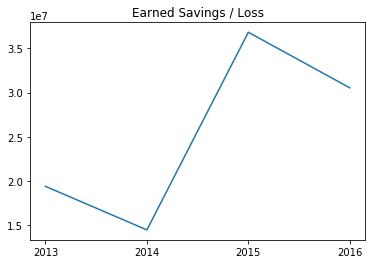

In [37]:
import matplotlib.pyplot as plt

EarnSave16 = df16.loc[:,['16_EarnSaveLoss']]
EarnSave15 = df15.loc[:,['15_EarnSaveLoss']]
EarnSave14 = df14.loc[:,['14_EarnSaveLoss']]
EarnSave13 = df13.loc[:,['13_EarnShrSavings']]

EarnSaveLoss = EarnSave16.join(EarnSave15, how='left')
EarnSaveLoss = EarnSaveLoss.join(EarnSave14, how='left')
EarnSaveLoss = EarnSaveLoss.join(EarnSave13, how='left')

ACO_of_interest = 'A67373'


ACOEarnSave16 = EarnSaveLoss.at[ACO_of_interest,'16_EarnSaveLoss']
ACOEarnSave15 = EarnSaveLoss.at[ACO_of_interest,'15_EarnSaveLoss']
ACOEarnSave14 = EarnSaveLoss.at[ACO_of_interest,'14_EarnSaveLoss']
ACOEarnSave13 = EarnSaveLoss.at[ACO_of_interest,'13_EarnShrSavings']

y = [ACOEarnSave13, ACOEarnSave14, ACOEarnSave15, ACOEarnSave16]
x = ['2013','2014','2015','2016']

plt.title('Earned Savings / Loss')
plt.plot(x, y)
plt.show()
